# Using Gensim to create word embeddings.

In this notebook we will use Gensime to create word embeddings from a corpus.

---

Firstly, we download the corpus.

In [1]:
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt"

--2022-10-27 09:34:25--  https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492161 (481K) [text/plain]
Saving to: ‘Book 1 - The Philosopher's Stone.txt’

Book 1 - The Philos 100%[===================>] 480.63K  --.-KB/s    in 0.02s   

2022-10-27 09:34:26 (28.4 MB/s) - ‘Book 1 - The Philosopher's Stone.txt’ saved [492161/492161]

--2022-10-27 09:34:26--  https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conn

In [3]:
pwd

'/content'

In [4]:
!ls

a_song_of_ice_and_fire_1.txt  a_song_of_ice_and_fire_4.txt
a_song_of_ice_and_fire_2.txt  a_song_of_ice_and_fire_5.txt
a_song_of_ice_and_fire_3.txt  sample_data


## Import all necessary modules.

In [5]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Train Gensim.

In [6]:
class Sentences(object):
    def __init__(self):
        self.sentence_count = 0
        self.epoch = 0

    def __iter__(self):
        print(f"Epoch {self.epoch}")
        self.epoch += 1

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        for fname in files:
            with open(fname) as f_input:
                corpus = f_input.read()
            raw_sentences = sent_tokenize(corpus)
            for sentence in raw_sentences:
                if len(sentence) > 0:
                    self.sentence_count += 1
                    yield simple_preprocess(sentence)


sentences = Sentences()

model = Word2Vec(
    sg=1,
    size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count())

model.build_vocab(sentences)

model.train(sentences=sentences, total_examples=model.corpus_count, epochs=5)

print("Done.")

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Done.


## Find most similar words.

In [9]:
model.wv.most_similar("stark", topn=20)

[('eddard', 0.7586962580680847),
 ('executed', 0.6687114238739014),
 ('starks', 0.6488189697265625),
 ('edda', 0.6291676759719849),
 ('beheaded', 0.6275458335876465),
 ('winterfell', 0.6269525289535522),
 ('quent', 0.6088985204696655),
 ('paramount', 0.59844970703125),
 ('brotherly', 0.5949316024780273),
 ('presumed', 0.5937714576721191),
 ('brandon', 0.5927574634552002),
 ('execution', 0.5885848999023438),
 ('brando', 0.5880261063575745),
 ('betrothal', 0.587320864200592),
 ('pledging', 0.5864450931549072),
 ('divulge', 0.582740068435669),
 ('prisoner', 0.5815184116363525),
 ('direwolf', 0.5808875560760498),
 ('aunts', 0.5793482065200806),
 ('boltons', 0.5774881839752197)]

## Plot word similarities.

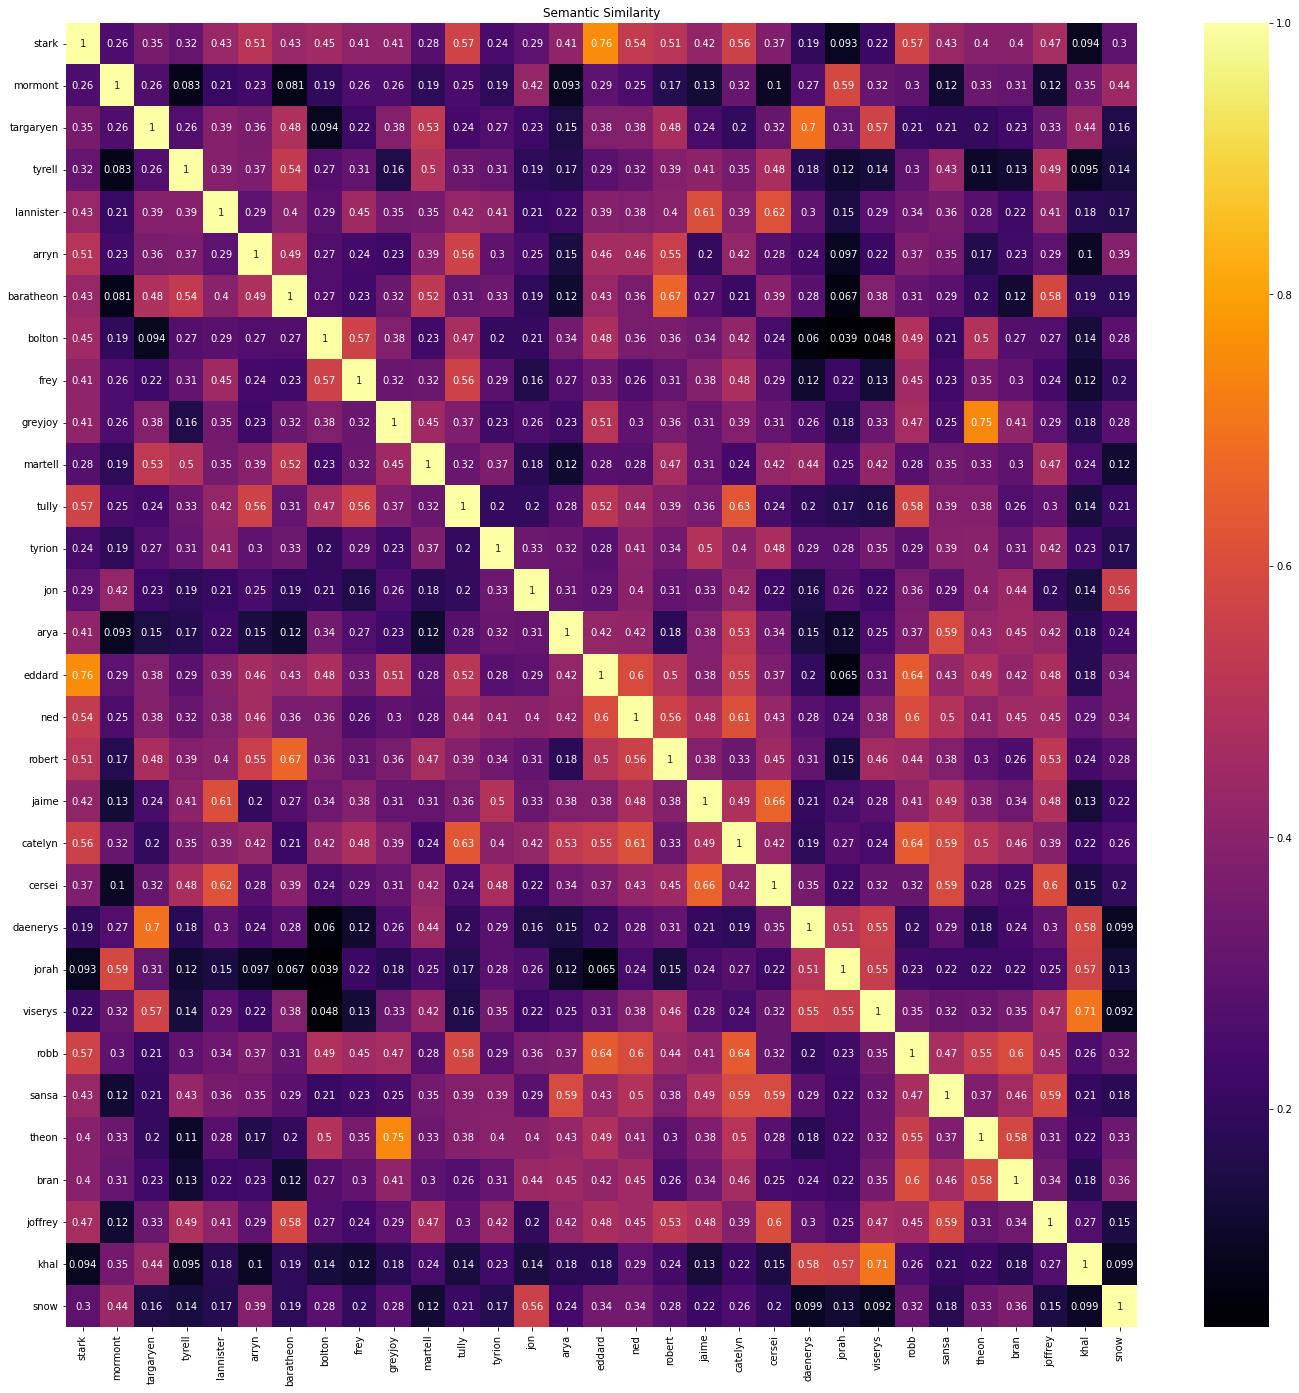

In [33]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]
    
    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(24, 24))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

    fig.savefig("myplot.png")
            
words = [ "stark", "mormont", "targaryen", "tyrell", "lannister",  "arryn", "baratheon", "bolton", "frey", "greyjoy", "martell", "tully", 
          # "westeros", "watch", "wall",
          "tyrion", "jon", "arya", "eddard", "ned", "robert", "jaime", "catelyn", "cersei", "daenerys",  "jorah", "viserys", "robb", "sansa",  "theon", "bran",  "joffrey",   "khal",
          # "hand", 
          # "king",
          # "thorne", "dragon",
          # "witch",
          "snow"
]
plot_similarities(words)



# "essos",
# "eddard", "ned", "robert", "jaime", "catelyn", "cersei", "daenerys",  "jorah", "viserys", "robb", "sansa",  "arya",  "theon", "bran",  "joffrey",   "khal"

# Thank you!